In [21]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
import requests
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [2]:
r = requests.get("https://api.opendota.com/api/proPlayers")
print(r.json()[:1])
pros = pd.DataFrame(r.json())
pros.set_index("account_id",inplace=True)
print(pros)



[{'account_id': 88470, 'steamid': '76561197960354198', 'avatar': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/b9/b92793127bfa6ceb1edbd2b7b25011b1dc6db89e.jpg', 'avatarmedium': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/b9/b92793127bfa6ceb1edbd2b7b25011b1dc6db89e_medium.jpg', 'avatarfull': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/b9/b92793127bfa6ceb1edbd2b7b25011b1dc6db89e_full.jpg', 'profileurl': 'https://steamcommunity.com/id/misterdurst69/', 'personaname': 'Tzy丶', 'last_login': None, 'full_history_time': '2021-06-01T15:17:40.236Z', 'cheese': 0, 'fh_unavailable': False, 'loccountrycode': 'CN', 'last_match_time': '2021-06-23T16:32:54.000Z', 'plus': True, 'name': 'Tzy丶', 'country_code': 'cn', 'fantasy_role': 1, 'team_id': 8126892, 'team_name': 'Team Magma', 'team_tag': 'Magma', 'is_locked': True, 'is_pro': True, 'locked_until': None}]
                      steamid  \
account_id                      
88470  

In [3]:
import time

ds = []
count = 0
skipped = []
for account_id in pros.index:
    #name = goodteams.loc[goodteams['team_id'] == team_id]["tag"]
    #print(name)
    
    #df.loc[df.Letters=='C','Letters'].values[0]
    name = pros.loc[pros.index == account_id].name.item()
    print("Grabbing: {0} Count: {1}".format(name,count))
    r = requests.get("https://api.opendota.com/api/players/{0}/heroes".format(account_id)).json()
    #now we want to convert to the right format
    d = {"account_id":account_id}
    #d = {}
    for i in r:
        try:
            d[i['hero_id']] = i['games']
        except (TypeError, gaierror) as e:
            print("Skipped {0}".format(account_id))
            print(r)
            continue
    ds.append(d)
    time.sleep(5)
    count += 1
    
skippedagain = []
for account_id in skipped:
    #name = goodteams.loc[goodteams['team_id'] == team_id]["tag"]
    #print(name)
    
    #df.loc[df.Letters=='C','Letters'].values[0]
    name = pros.loc[pros.account_id == account_id].name.item()
    print("Grabbing: {0} Count: {1}".format(name,count))
    r = requests.get("https://api.opendota.com/api/players/{0}/heroes".format(account_id)).json()
    #now we want to convert to the right format
    d = {"account_id":account_id}
    #d = {}
    for i in r:
        try:
            d[i['hero_id']] = i['games']
        except (TypeError, gaierror) as e:
            print("Skipped {0}".format(account_id))
            print(r)
            skippedagain.append(account_id)
            continue
    ds.append(d)
    time.sleep(10)
    count += 1
    

C:\Users\5cent\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: `item` has been deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()


Grabbing: Tzy丶 Count: 0
Grabbing: YrikGood Count: 1
Grabbing: Newsham Count: 2
Grabbing: swag- Count: 3
Grabbing: Eric 복수 Count: 4
Grabbing: EGM Count: 5
Grabbing: March Count: 6
Grabbing: syndereN Count: 7
Grabbing: fn` Count: 8
Grabbing: solen Count: 9
Grabbing: davy Count: 10
Grabbing: pieliedie Count: 11
Grabbing: pandaego Count: 12
Grabbing: Durp Durp Count: 13
Grabbing: Trixi Count: 14
Grabbing: PetoGilnor Count: 15
Grabbing: yamich Count: 16
Grabbing: Sneyking Count: 17
Grabbing: The Bleeper Count: 18
Grabbing: uu Count: 19
Grabbing: VANSKOR Count: 20
Grabbing: Nix Count: 21
Grabbing: LIMMP Count: 22
Grabbing: Stormcode Count: 23
Grabbing: rmape Count: 24
Grabbing: Accell Count: 25
Grabbing: TheBloodySky Count: 26
Grabbing: xiaofeng Count: 27
Grabbing: PAADA Count: 28
Grabbing: Zavier Count: 29
Grabbing: tOfu Count: 30
Grabbing: Socks Count: 31
Grabbing: Yaki Count: 32
Grabbing: Handsken Count: 33
Grabbing: Sasquatch Count: 34
Grabbing: Kummisetä Count: 35
Grabbing: N0tail Count

Grabbing: Ouker Count: 289
Grabbing: 33 Count: 290
Grabbing: w33 Count: 291
Grabbing: ixmike88 Count: 292
Grabbing: Funn1k Count: 293
Grabbing: Resolut1on Count: 294
Grabbing: MSS Count: 295
Grabbing: ViGGo Count: 296
Grabbing: PPD Count: 297
Grabbing: failetz Count: 298
Grabbing: Qojqva Count: 299
Grabbing: Lubby Count: 300
Grabbing: RyuUBoruZ Count: 301
Grabbing: zuni Count: 302
Grabbing: Arteezy Count: 303
Grabbing: Jason Count: 304
Grabbing: MaRiO Count: 305
Grabbing: Scandal Count: 306
Grabbing: Swiftending Count: 307
Grabbing: Seri Count: 308
Grabbing: Emperor Count: 309
Grabbing: WinteR Count: 310
Grabbing: Kygo Count: 311
Grabbing: JessieVash* Count: 312
Grabbing: ŁЪωŁꞗω。坎木 Count: 313
Grabbing: AfterLife Count: 314
Grabbing: x4kep Count: 315
Grabbing: garter Count: 316
Grabbing: Fata Count: 317
Grabbing: Mag Count: 318
Grabbing: Monkeys-forever Count: 319
Grabbing: NUAGES Count: 320
Grabbing: Costabile Count: 321
Grabbing: 水瓶座num9527 Count: 322
Grabbing: Michael Count: 323
Grab

Grabbing: Jarifool Count: 580
Grabbing: Ceyler Count: 581
Grabbing: MP Count: 582
Grabbing: Setzero Count: 583
Grabbing: LilBoiNoah Count: 584
Grabbing: Loda Count: 585
Grabbing: Fisherman Count: 586
Grabbing: Zipun Count: 587
Grabbing: 跳刀跳刀丶 Count: 588
Grabbing: Zenki Count: 589
Grabbing: fy Count: 590
Grabbing: _DotA-and-Die_ Count: 591
Grabbing: Hitsuzen Count: 592
Grabbing: slad1n Count: 593
Grabbing: NoiA Count: 594
Grabbing: reynolds Count: 595
Grabbing: miggeL.Z Count: 596
Grabbing: Aoko Count: 597
Grabbing: Amorphous Blob Count: 598
Grabbing: n1tsuga Count: 599
Grabbing: JoHnNy Count: 600
Grabbing: 楚源Cy Count: 601
Grabbing: DJ Count: 602
Grabbing: One Autumn Leaf Count: 603
Grabbing: Negi Count: 604
Grabbing: Xoicy Count: 605
Grabbing: Darly Count: 606
Grabbing: Oldye Count: 607
Grabbing: grentxd Count: 608
Grabbing: Preap Count: 609
Grabbing: peter☺99 Count: 610
Grabbing: cozy Count: 611
Grabbing: ReiSeN Count: 612
Grabbing: Brats- Count: 613
Grabbing: lazaree Count: 614
Grabb

Grabbing: Suco de Fruta Count: 868
Grabbing: NextDay Count: 869
Grabbing: Firestorm Count: 870
Grabbing: sK3~ Count: 871
Grabbing: 反叛54321971 Count: 872
Grabbing: Duster Count: 873
Grabbing: midone Count: 874
Grabbing: Whiskey Count: 875
Grabbing: sl Count: 876
Grabbing: Norvack Count: 877
Grabbing: Sosysich Count: 878
Grabbing: eace Count: 879
Grabbing: Kp.Samael Count: 880
Grabbing: 24. Count: 881
Grabbing: I - SEE Count: 882
Grabbing: Eixn Count: 883
Grabbing: Palantimos Count: 884
Grabbing: murd0c Count: 885
Grabbing: dyrachyo Count: 886
Grabbing: 1111111111111111 Count: 887
Grabbing: Pablo Count: 888
Grabbing: Paradise Count: 889
Grabbing: Pandaboo Count: 890
Grabbing: sGG Count: 891
Grabbing: SNEI0-SN	 Count: 892
Grabbing: Bun Count: 893
Grabbing: 温柔 Count: 894
Grabbing: zhi Count: 895
Grabbing: Dream波 Count: 896
Grabbing: Akce Count: 897
Grabbing: Moogy Count: 898
Grabbing: luki luki Count: 899
Grabbing: SoNNeikO Count: 900
Grabbing: Chu Count: 901
Grabbing: onfir33 Count: 902
G

Grabbing: hym Count: 1151
Grabbing: 朝圣者 Count: 1152
Grabbing: 2EdGy 4 H3LL Count: 1153
Grabbing: AYuNiD Count: 1154
Grabbing: MG Count: 1155
Grabbing: LOyd Count: 1156
Grabbing: xiaofu Count: 1157
Grabbing: JaxAttack Count: 1158
Grabbing: Vanterlord Count: 1159
Grabbing: old chicken Count: 1160
Grabbing: 0 Count: 1161
Grabbing: Sy Count: 1162
Grabbing: Yci Count: 1163
Grabbing: Enraptured  Count: 1164
Grabbing: 圣子华炼 God King-虎 FEeDeR Count: 1165
Grabbing: Lww Count: 1166
Grabbing: 方云华 Count: 1167
Grabbing: kAANMPPV Count: 1168
Grabbing: 强混哥 Count: 1169
Grabbing: Magi Count: 1170
Grabbing: QYQX Count: 1171
Grabbing: Meteor Count: 1172
Grabbing: Storik- Count: 1173
Grabbing: Fame Count: 1174
Grabbing: Eros Count: 1175
Grabbing: Waixi Count: 1176
Grabbing: Sold out Count: 1177
Grabbing: 劣势路猛男 Count: 1178
Grabbing: -Maiu Count: 1179
Grabbing: JG4:13 Count: 1180
Grabbing: Aloriac Count: 1181
Grabbing: tomorrow Count: 1182
Grabbing: Whitemon Count: 1183
Grabbing: kkkk Count: 1184
Grabbing: F

Grabbing: bowbowbow Count: 1432
Grabbing: .Lonely Count: 1433
Grabbing: Rumpel Count: 1434
Grabbing: Rain pause. Count: 1435
Grabbing: Sign Count: 1436
Grabbing: James Count: 1437
Grabbing: sugar baby Count: 1438
Grabbing: 163891868 Count: 1439
Grabbing: .zif Count: 1440
Grabbing: rApRaP Count: 1441
Grabbing: Kom4rt Count: 1442
Grabbing: Cat you Count: 1443
Grabbing: Armel Count: 1444
Grabbing: longb Count: 1445
Grabbing: Killuminati Count: 1446
Grabbing: k1   Count: 1447
Grabbing: Shad Count: 1448
Grabbing: Ifzitsut Count: 1449
Grabbing: Huppey Count: 1450
Grabbing: 生死 Count: 1451
Grabbing: sh Count: 1452
Grabbing: Kibihc Count: 1453
Grabbing: YuushA Count: 1454
Grabbing: Leya Vesta Fors Count: 1455
Grabbing: arteezys bastard Count: 1456
Grabbing: agressive child Count: 1457
Grabbing: fantasy- Count: 1458
Grabbing: Dj tape) Count: 1459
Grabbing: Aloneke Count: 1460
Grabbing: zero Count: 1461
Grabbing: nm Count: 1462
Grabbing: 清净 Count: 1463
Grabbing: SPACEMAN Count: 1464
Grabbing: Hol

Grabbing: satan Count: 1713
Grabbing: Clark kent Count: 1714
Grabbing: Love u eleven<3 Count: 1715
Grabbing: Sirc Count: 1716
Grabbing: njautobodyy Count: 1717
Grabbing: phoenix Count: 1718
Grabbing: я не в себе Count: 1719
Grabbing: Aque Count: 1720
Grabbing: Ainkrad Count: 1721
Grabbing: Focus. Count: 1722
Grabbing: Aq Count: 1723
Grabbing: Iroha Count: 1724
Grabbing: Stephan Count: 1725
Grabbing: suzuya Count: 1726
Grabbing: spacyh Count: 1727
Grabbing: 458 Count: 1728
Grabbing: Konichan02 Count: 1729
Grabbing: ZaTta Count: 1730
Grabbing: Meldan Count: 1731
Grabbing: IU Count: 1732
Grabbing: Astral Count: 1733
Grabbing: kxy- Count: 1734
Grabbing: Niento Count: 1735
Grabbing: MiDong Count: 1736
Grabbing: 绵绵 Count: 1737
Grabbing: lowkez Count: 1738
Grabbing: Corey Count: 1739
Grabbing: o Count: 1740
Grabbing: Red Count: 1741
Grabbing: fam0us Count: 1742
Grabbing: Kayeen Count: 1743
Grabbing: FACEHUGGER Count: 1744
Grabbing: Pinoki0- Count: 1745
Grabbing: Dust Count: 1746
Grabbing: Com

Grabbing: Almagest Dota 2 Picker Count: 1993
Grabbing: Ace12 Count: 1994
Grabbing: SOUTHSIDEboi Count: 1995
Grabbing: siLou Count: 1996
Grabbing: bilu Count: 1997
Grabbing: Angel Count: 1998
Grabbing: lawlesshy Count: 1999
Grabbing: poyoyo Count: 2000
Grabbing: pingu Count: 2001
Grabbing: Eve Count: 2002
Grabbing: HuiHui‘’ Count: 2003
Grabbing: Mrdyzl Count: 2004
Grabbing: Michael- Count: 2005
Grabbing: Aretes Count: 2006
Grabbing: i wnt 2 die Count: 2007
Grabbing: xactl Count: 2008
Grabbing: Drii Count: 2009
Grabbing: sunset Count: 2010
Grabbing: РЕПТАЙЛ КИНГ Count: 2011
Grabbing: metoou Count: 2012
Grabbing: StarGazer_時の横顔 Count: 2013
Grabbing: BeeBie Count: 2014
Grabbing: R3BBY Count: 2015
Grabbing: 555 Count: 2016
Grabbing: Shadow_ Count: 2017
Grabbing: NingaProBro Count: 2018
Grabbing: QyQc Count: 2019
Grabbing: Damaroo Count: 2020
Grabbing: merlucita Count: 2021
Grabbing: Kanom``Pang Count: 2022
Grabbing: Yung_Plague  Count: 2023
Grabbing: dreev Count: 2024
Grabbing: Kong Count: 

Grabbing: askme Count: 2267
Grabbing: NWordJohnson Count: 2268
Grabbing: deadscum Count: 2269
Grabbing: opa Count: 2270
Grabbing: Husky Count: 2271
Grabbing: layme Count: 2272
Grabbing: Coldskull Count: 2273
Grabbing: Silent Count: 2274
Grabbing: xy- Count: 2275
Grabbing: Sensibility Count: 2276
Grabbing: TSHunter Count: 2277
Grabbing: hPL Count: 2278
Grabbing:           Count: 2279
Grabbing: dot Count: 2280
Grabbing: Ramley Count: 2281
Grabbing: hunghung Count: 2282
Grabbing: 憨憨大王 Count: 2283
Grabbing: Вася) Count: 2284
Grabbing: GitGudMe Count: 2285
Grabbing: KaRboN Count: 2286
Grabbing: VADEMON Count: 2287
Grabbing: White丶Album_白学家 Count: 2288
Grabbing: LT.Erosha Count: 2289
Grabbing: KPA6 Count: 2290
Grabbing: 23 Count: 2291
Grabbing: Emochu Count: 2292
Grabbing: ilal Count: 2293
Grabbing: Kaiyko Count: 2294
Grabbing: Solopro Count: 2295
Grabbing: D4Rk Count: 2296
Grabbing: INSIDIOUSC Count: 2297
Grabbing: MrZappy Count: 2298
Grabbing: Slash Count: 2299
Grabbing: Sommus Count: 2300

Grabbing: 新手上路 Count: 2540
Grabbing: Gibkiy Count: 2541
Grabbing: Meley Count: 2542
Grabbing: tilttt Count: 2543
Grabbing: ASUNA	 Count: 2544
Grabbing: CeJay Count: 2545
Grabbing: Mel m Count: 2546
Grabbing: destiny Count: 2547
Grabbing: kingdom Count: 2548
Grabbing: Moonlight Count: 2549
Grabbing: DarkMago♥ Count: 2550
Grabbing: балаклава)) Count: 2551
Grabbing: DanerOk Count: 2552
Grabbing: Tvv1ce Count: 2553
Grabbing: Badman Count: 2554
Grabbing: jupiter Count: 2555
Grabbing: Daze Count: 2556
Grabbing: PAMELA Count: 2557
Grabbing: Len Count: 2558
Grabbing: GL1n Count: 2559
Grabbing: Shaka Count: 2560
Grabbing: Jabz Count: 2561
Grabbing: aqua Count: 2562
Grabbing: IMP.ButterflyEffect Count: 2563
Grabbing: MyNezuko Count: 2564
Grabbing: Venomous Count: 2565
Grabbing: Leaf Count: 2566
Grabbing: life or death Count: 2567
Grabbing: Neotrox Count: 2568
Grabbing: gyo Count: 2569
Grabbing: Nesfeer Count: 2570
Grabbing: SuperPogo Count: 2571
Grabbing: 萧容鱼 Count: 2572
Grabbing: Kokidoto  Coun

In [4]:
r = requests.get("https://api.opendota.com/api/proPlayers")
#print(r.json()[:1])
pros = pd.DataFrame(r.json())
pros.set_index("account_id",inplace=True)
#print(pros)


In [5]:
#print(ds[:10])
proheroes = pd.DataFrame(ds)
proheroes.fillna(0,inplace=True)
proheroes.set_index("account_id",inplace=True)
heropros = proheroes.T
heropros = heropros.div(heropros.sum(axis=1), axis=0)
print(heropros.index)
heropros.index = pd.to_numeric(heropros.index)
heropros.sort_index(inplace=True)
print(heropros.index)

proheroes = proheroes.div(proheroes.sum(axis=1), axis=0)
proheroes = proheroes[pros.fantasy_role != 0]
pros = pros[pros.fantasy_role != 0]
proheroes = proheroes[pros.fantasy_role != 3]
pros = pros[pros.fantasy_role != 3]


print(proheroes)
print(heropros)


Index(['2', '69', '120', '14', '100', '62', '73', '41', '129', '28',
       ...
       '105', '109', '111', '121', '113', '66', '91', '82', '92', '123'],
      dtype='object', length=121)
Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            113, 114, 119, 120, 121, 123, 126, 128, 129, 135],
           dtype='int64', length=121)
                   2        69       120        14       100        62  \
account_id                                                               
88470       0.043378  0.042958  0.041487  0.039387  0.027833  0.027413   
639740      0.009142  0.008888  0.002539  0.007110  0.005841  0.011427   
1296625     0.006363  0.009718  0.003239  0.041647  0.011337  0.010296   
1400303     0.000000  0.003823  0.006881  0.000000  0.000765  0.005352   
1470116     0.000000  0.001993  0.000000  0.053821  0.000000  0.001993   
...              ...       ...       ...       ...       ...       ...   
1138242584  0.000000  0.000000  0.000000 

In [6]:
proheroes.to_csv('proheroes.csv')
heropros.to_csv('heropros.csv')

In [7]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(proheroes)
#embedding.shape


In [8]:
pros.fantasy_role.replace(to_replace=4,value=1,inplace=True)




[<matplotlib.lines.Line2D object at 0x000001969F1E2C08>, <matplotlib.lines.Line2D object at 0x000001969F1DE148>] ['$\\mathdefault{1}$', '$\\mathdefault{2}$']


Text(0.5, 1.0, 'UMAP of hero preferences')

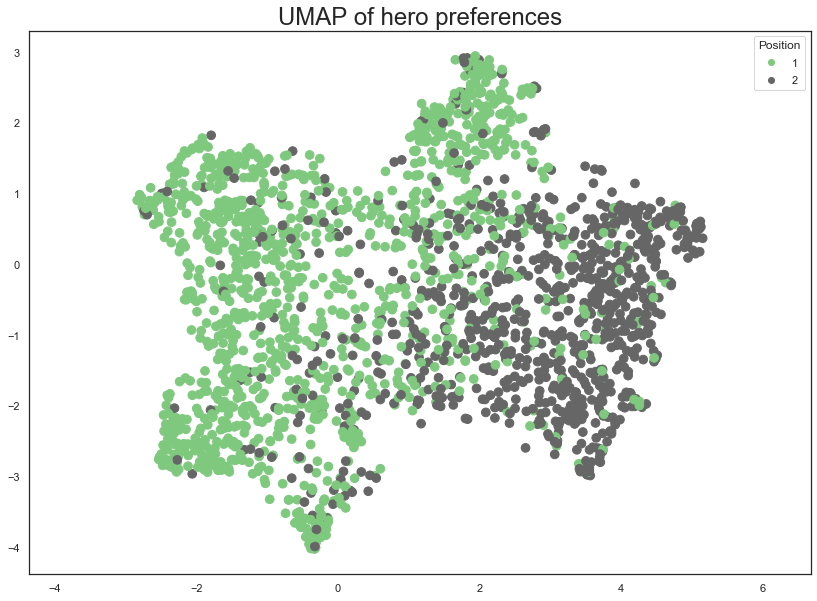

In [22]:
#roles = [x for x in pros.fantasy_role]
#print(roles)
#label = [x for x in pros[:50].fantasy_role]

scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=[x for x in pros.fantasy_role],cmap="Accent",s=75)
print(*scatter.legend_elements())
legend = plt.legend(*scatter.legend_elements(),loc="upper right",title="Position")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP of hero preferences', fontsize=24)


In [13]:
from io import BytesIO
from PIL import Image
import base64

def embeddable_image(data):
    img_data = 255 - 15 * data.astype(np.uint8)
    image = Image.fromarray(img_data, mode='L').resize((64, 64), Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral5

output_notebook()

Loading BokehJS ...

In [14]:
embed_df = pd.DataFrame(embedding, columns=('x', 'y'))
embed_df['name'] = [str(x) for x in pros.name]
embed_df['fantasy_role'] = [str(x) for x in pros.fantasy_role]
embed_df['country_code'] = [str(x) for x in pros.country_code]


print(embed_df)

             x         y          name fantasy_role country_code
0     1.971697  1.813425          Tzy丶            1           cn
1     3.748108 -0.121019      YrikGood            1           by
2     2.312421 -2.020635       Newsham            2             
3    -2.466422 -2.131029         swag-            1           cn
4     3.791939  0.171675       Eric 복수            2           ph
...        ...       ...           ...          ...          ...
2257  5.018818  0.198228      G.O.A.T.            2             
2258 -2.371100 -2.286350  Canus Vulpus            1             
2259 -2.070164  1.621690    Pale Horse            1             
2260  1.799194  2.226729        Gremlo            1             
2261 -1.589065 -0.424450        𝒑𝒂𝒓𝒌𝒆𝒓            1             

[2262 rows x 5 columns]


([<matplotlib.lines.Line2D object at 0x000001969C40C108>, <matplotlib.lines.Line2D object at 0x000001969C40A248>], ['$\\mathdefault{0}$', '$\\mathdefault{1}$'])


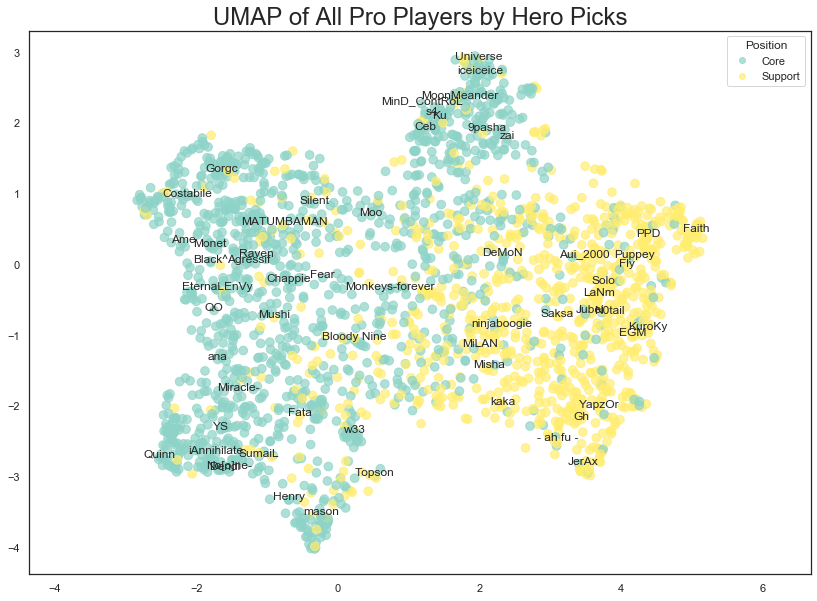

In [32]:
scatter = plt.scatter(embed_df.x, embed_df.y, c=[(int(x)-1) for x in embed_df.fantasy_role],cmap="Set3",s=75,alpha=0.7)
print(scatter.legend_elements())
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, ['Core','Support'], loc="upper right", title="Position")


#legend = plt.legend(['Core','Support'],loc="upper right",title="Position")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP of All Pro Players by Hero Picks', fontsize=24)

tolabel = ['KuroKy','PPD','Jubei','Costabile', 'SumaiL', 'Ame','Agressif','Monet','YS','No[o]ne-','Dendi','Henry',
           'Topson','Fear','Mushi','Moo','MoonMeander','Universe','iceiceice','MinD_ContRoL','zai','Aui_2000','Puppey','Gh','JerAx',
           'YapzOr','Bloody Nine','mason','Quinn','iAnnihilate','Miracle-','Ku','DeMoN','Gorgc','Silent','MATUMBAMAN',
          'Fly','N0tail','kaka','MiLAN','ninjaboogie','Black^','QO','Monkeys-forever','Misha','Saksa','w33','9pasha','Ceb','- ah fu -',
           'Chappie','Fata','ana','Faith','EGM','Solo','Raven','LaNm','s4','EternaLEnVy']


for n in tolabel:
    row = embed_df[embed_df['name'] == n]
    #print(row)
    #print(row.x.values)
    
    label = n
    point = (row.x.values[0],row.y.values[0])

    plt.annotate(label, # this is the text
                 point, # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


In [16]:
datasource = ColumnDataSource(embed_df)
color_mapping = CategoricalColorMapper(factors=[str(x) for x in range(5)],
                                       palette=Spectral5) 

plot_figure = figure(
    title='UMAP projection of hero preferences',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <span style='font-size: 16px; color: #224499'>Name:</span>
        <span style='font-size: 18px'>@name</span>
        <span style='font-size: 18px'>@country_code</span>        
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='fantasy_role', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=12
)

print(plot_figure)

show(plot_figure)

Figure(id='1005', ...)


In [17]:
reducer = umap.UMAP()
embeddingT = reducer.fit_transform(heropros)
#embedding.shape


In [18]:
#https://api.opendota.com/api/heroes
    
r = requests.get("https://api.opendota.com/api/heroes")
print(r.json()[:1])
heroes = pd.DataFrame(r.json())
heroes.set_index("id",inplace=True)
print(heroes)
print(heropros)

[{'id': 1, 'name': 'npc_dota_hero_antimage', 'localized_name': 'Anti-Mage', 'primary_attr': 'agi', 'attack_type': 'Melee', 'roles': ['Carry', 'Escape', 'Nuker'], 'legs': 2}]
                             name  localized_name primary_attr attack_type  \
id                                                                           
1          npc_dota_hero_antimage       Anti-Mage          agi       Melee   
2               npc_dota_hero_axe             Axe          str       Melee   
3              npc_dota_hero_bane            Bane          int      Ranged   
4       npc_dota_hero_bloodseeker     Bloodseeker          agi       Melee   
5    npc_dota_hero_crystal_maiden  Crystal Maiden          int      Ranged   
..                            ...             ...          ...         ...   
123        npc_dota_hero_hoodwink        Hoodwink          agi      Ranged   
126     npc_dota_hero_void_spirit     Void Spirit          int       Melee   
128        npc_dota_hero_snapfire        Snapf

In [19]:
embedT_df = pd.DataFrame(embeddingT, columns=('x', 'y'))
embedT_df['localized_name'] = [str(x) for x in heroes.localized_name]
embedT_df['primary_attr'] = [str(x) for x in heroes.primary_attr]
embedT_df['roles'] = [str(x) for x in heroes.roles]
embedT_df['attack_type '] = [str(x) for x in heroes.attack_type ]
embedT_df['legs'] = [str(x) for x in heroes.legs]

([<matplotlib.lines.Line2D object at 0x000001969F2C9CC8>, <matplotlib.lines.Line2D object at 0x000001969F2A1E88>, <matplotlib.lines.Line2D object at 0x000001969F2CC408>], ['$\\mathdefault{1}$', '$\\mathdefault{2}$', '$\\mathdefault{3}$'])


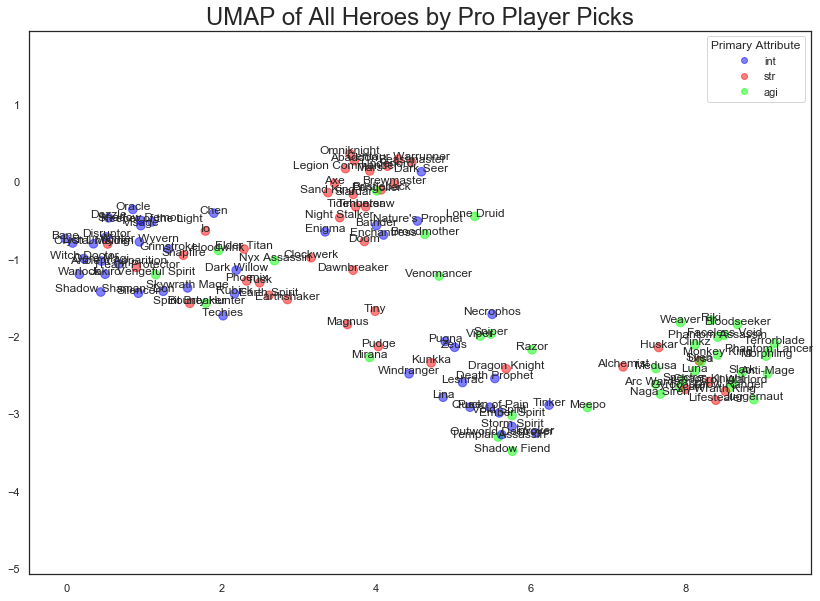

In [34]:
attr = {'str':2,'agi':3,'int':1}

scatter = plt.scatter(embedT_df.x, embedT_df.y, c=[attr[x] for x in embedT_df.primary_attr],cmap="brg",s=75,alpha=0.5)
print(scatter.legend_elements())
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, ['int','str','agi'], loc="upper right", title="Primary Attribute")


#legend = plt.legend(['Core','Support'],loc="upper right",title="Position")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP of All Heroes by Pro Player Picks', fontsize=24)

for index, row in embedT_df.iterrows():
    
    label = row.localized_name
    point = (row.x,row.y)

    plt.annotate(label, # this is the text
                 point, # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
